In [30]:
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [39]:
def watercolor(dfs):
    with plt.style.context('seaborn-whitegrid'): 
        plt.figure(figsize=(3.4,2))
        
        for n, (label, df) in enumerate(dfs):    
            # plot the 3rd stdv        
            color = f'C{n}'
            plt.fill_between(df.x, df['low'], df['hi'], alpha=0.5, color=color)
            plt.plot(df.x, df['val'], color=color, label=label)
            
        plt.rc('legend', fontsize=8)   # legend fontsize
        
        

        plt.xlabel('time')
        plt.ylabel('regret')
        plt.legend(frameon=True, loc='lower right')
        plt.tight_layout()

    plt.savefig('newyorker.pdf', bbox_inches='tight')
    plt.show()

```console
% python ./munge_zn.py data_from_zhu_nowak.txt > munge_zn.json
% python ./booty-res.py run-squarecbcorral.res > run-squarecbcorral.boot.json
```

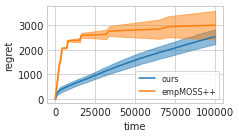

In [40]:
def flass():
    from math import sqrt
    
    dfs = {}
    
    with open('run-squarecbcorral.boot.json') as f:
        ours = json.load(f)
        dfs['ours'] = pd.DataFrame([ (n , n*(1-adjhi), n*(1-mid), n*(1-adjlo), mid)
                                       for k, (m, lo, hi) in ours.items() 
                                       for n in (int(k),)
                                       for mid in ((lo+hi)/2,) 
                                       for adjlo in (mid+sqrt(m)*(lo-mid),)
                                       for adjhi in (mid+sqrt(m)*(hi-mid),)
                                     ],
                                     columns=('x', 'low', 'val', 'hi', 'mid'))
            
    rename = { #'alg:MOSS Oracle': 'MOSS Oracle',
               'alg:empMOSS++ (ours)': 'empMOSS++'
             }
    with open('munge_zn.json') as f:
        zhunowak = json.load(f)
        for alg, name in rename.items():
            ave = zhunowak[alg]['ave:']
            std = zhunowak[alg]['std:']
            assert len(ave) == len(std)
            dfs[name] = pd.DataFrame([ ((200 * x) , mu - s, mu, mu + s) for x, (mu, s) in enumerate(zip(ave, std)) ], 
                                     columns=('x', 'low', 'val', 'hi'))
            
    watercolor([ (k, v) for k, v in dfs.items() ])

flass()